In [19]:
# imports
import keras 
import cv2 # opencv
import glob
import os
from pathlib import Path
import matplotlib.pyplot as plt

# definitons of constants/variables
video_file_glob_path = '../../videos/*.avi'
image_base_path = '../../images/'

In [6]:
# capture the videos and extract frames
for video_path in glob.glob(video_file_glob_path):
    cap = cv2.VideoCapture(video_path)
    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    image_folder_path = image_base_path + os.path.basename(video_path).split('.')[0]
    Path(image_folder_path).mkdir(parents=True, exist_ok=True)
    
    while(cap.isOpened()):
        frame_id = cap.get(cv2.CAP_PROP_POS_FRAMES)
        ret, frame = cap.read()
        # frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        if not ret:
            print('Failed to read frame %d of video %r.', frame_id, video_path)
            break
            
        filename = image_folder_path + '/frame%d.jpg' % frame_id
        cv2.imwrite(filename, frame)
        
        if frame_id == 300:
            break

In [55]:
# this section hold useful helper functions and transformers

# method for image resizing and extracting vector of raw values
def extract_value_vector(image, size=(128, 128)):
    return cv2.resize(image, size).flatten()

def extract_colour_histogram(image, bins=(32, 32, 32)):
    # convert image to hsv space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # extract color histogram from image and take all 3 channels into account
    color_hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    
    # normalize resulting histogram
    cv2.normalize(color_hist, color_hist)
    
    # print resulting historgram
    # plt.hist(image.ravel(),256,[0,256])
    cols = ('b', 'g', 'r')
    for i, col in enumerate(cols):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()
    
    # return histogram as feature vector
    return color_hist.flatten()

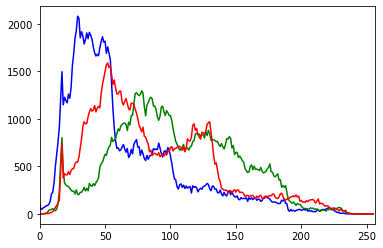

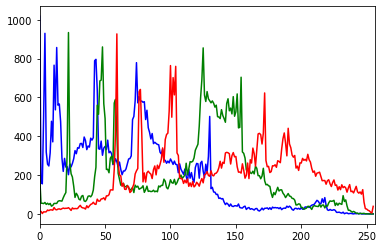

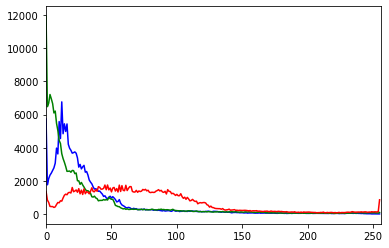

In [56]:
img = cv2.imread('kermit_test2.png')
img1 = cv2.imread('kermit_test.png')
img_ws = cv2.imread('ws.png')

print
hist_vector = extract_colour_histogram(img)
hist_vector = extract_colour_histogram(img1)
hist_vector = extract_colour_histogram(img_ws)